## Квадратичные сплайны

$\textbf{Квадратичный сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := c_k + b_k (x-x_k) + a_k (x-x_k)^2 ,$$ 

где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$

$\textbf{Обозначение квадратичного сплайна дефекта 1}$: $S^n_{2,1}$, где $n, 2, 1$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True) # чтобы оч маленькие значения печатались в виде нулей

In [3]:
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2 

## По $m$ равноотстоящим узлам

In [4]:
def quad_spline(arg, a, b, m, fig=None):
    x = np.linspace(a, b, m)
    # n - число квадратичных сплайнов, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
    # Надо решить 3*n уравнения
    n = m - 1

    # AB = C
    A = np.zeros((3*n, 3*n))
    C = np.zeros(3*n)

    for i in range(n):
        A[i, i] = x[i]**2
        A[i, n+i] = x[i]
        A[i, 2*n+i] = 1

        # Строки [n, 2n-1]
        A[n+i, i] = x[i+1]**2
        A[n+i, n+i] = x[i+1]
        A[n+i, 2*n+i] = 1

        C[i] = fn(x[i])
        C[n+i] = fn(x[i+1])

    # Строки [2n, 3n-1]
    for j in range(n-1): 
        row = 2*n+j
        columns = [j, j+1, n+j, n+j+1]
        values = 2*x[j+1], -2*x[j+1], 1, -1
        A[row, columns] = values

    # В последней строке задаем a_1 = 1    
    A[3*n-1, 0] = 1
# A[3*n-1, 0] = d

    # Решаем относительно b
    B = np.linalg.solve(A,C)
    ai = B[:n]
    bi = B[n:2*n]
    ci = B[2*n:]
    
    # График     
    if fig == True:
        plt.figure()
        for k in range(n):
            xspline = np.linspace(x[k], x[k+1])
            yspline = ai[k]*xspline**2 + bi[k]*xspline + ci[k]
            plt.plot(xspline, yspline, '-', linewidth=4)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('$S_{2,1}^n$ по равноотстоящим узлам для $f(x)$')
        plt.show()
        
    # Вычисление значений    
    elif fig == None:
        flag, res = 0, 0
        eps = 10**(-6)
        for i in range(n):
            if arg == a:
                arg += eps
                flag = i
                res = ai[flag]*arg**2 + bi[flag]*arg + ci[flag]
            elif arg == b:
                arg -= eps
                flag = i
                res = ai[flag]*arg**2 + bi[flag]*arg + ci[flag]
            elif (arg > x[i]) and (arg < x[i+1]):
                flag = i
                res = ai[flag]*arg**2 + bi[flag]*arg + ci[flag]
        return res

In [5]:
quad_spline(arg=-10, a=-10, b=10, m=4, fig=None)

100.17607089815226

## Изобразим $S_{2,1}^m$

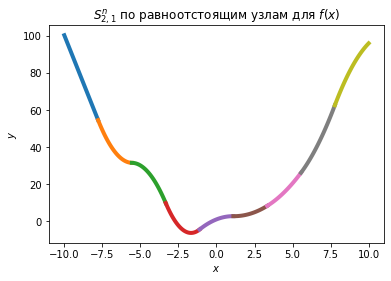

In [6]:
quad_spline(arg=10, a=-10, b=10, m=10, fig=True)

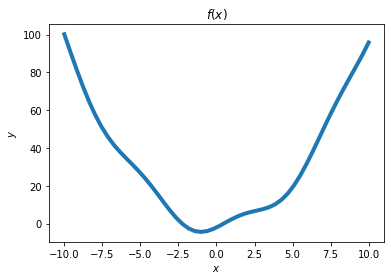

In [11]:
plt.figure()
x = np.linspace(-10, 10)
y = x**2 + 4*np.sin(x) - 2 
plt.plot(x, y, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$f(x)$')
plt.show()

## Оптимальные узлы Чебышева $$x_i = 0.5 \left((b-a)\cos\dfrac{(2i+1)\pi}{2(n+1)} + (b+a)\right),\; i\in \overline{0,n}$$

In [17]:
def optimal_quad_spline(arg, a, b, m, fig=None):    
    n = m - 1

    chebish = []
    for i in range(0, m):
        chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))

    # A_opt * B_opt = C_opt
    A_opt = np.zeros((3*n, 3*n))*1.0
    C_opt = np.zeros(3*n)*1.0

    for i in range(n):
        A_opt[i, i] = chebish[i]**2
        A_opt[i, n+i] = chebish[i]
        A_opt[i, 2*n+i] = 1

        # Строки [n, 2n-1]
        A_opt[n+i, i] = chebish[i+1]**2
        A_opt[n+i, n+i] = chebish[i+1]
        A_opt[n+i, 2*n+i] = 1

        C_opt[i] = fn(chebish[i])
        C_opt[n+i] = fn(chebish[i+1])

    # Строки [2n, 3n-1]
    for j in range(n-1): 
        A_opt[2*n+j, [j, j+1, n+j, n+j+1]] = 2*chebish[j+1], -2*chebish[j+1], 1, -1

    # В последней строке задаем a_1 = 1    
    A_opt[3*n-1, 0] = 1

    # Решаем относительно b
    B_opt = np.linalg.solve(A_opt, C_opt)
    ai_opt = B_opt[:n]
    bi_opt = B_opt[n:2*n]
    ci_opt = B_opt[2*n:]
    
    # График     
    if fig == True:
        plt.figure()
        for k in range(n):
            xspline_opt = np.linspace(chebish[k], chebish[k+1])
            yspline_opt = ai_opt[k]*xspline_opt**2 + bi_opt[k]*xspline_opt + ci_opt[k]
            plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.title('$S_{2,1}^n$ по узлам Чебышева для $f(x)$')
        plt.show()
        
    # Вычисление значений    
    elif fig == None:
        flag, res = 0, 0
        eps = 10**(-1)
        for i in range(n):
            if arg == a:
                arg += eps
                flag = i
                res = ai_opt[flag]*arg**2 + bi_opt[flag]*arg + ci_opt[flag]
            elif arg == b:
                arg -= eps
                flag = i
                res = ai_opt[flag]*arg**2 + bi_opt[flag]*arg + ci_opt[flag]
            elif (arg < chebish[i]) and (arg > chebish[i+1]):
                flag = i
                res = ai_opt[flag]*arg**2 + bi_opt[flag]*arg + ci_opt[flag]
        return res

In [19]:
optimal_quad_spline(arg=-10, a=-10, b=10, m=50, fig=None)    

97.84125239713589

## Изобразим $S_{2,1}^{m_{opt}}$

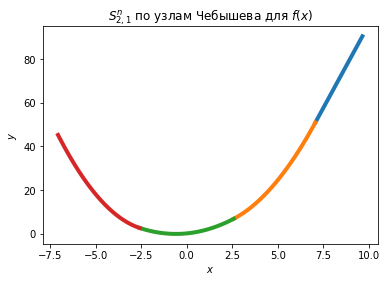

In [25]:
optimal_quad_spline(arg=5, a=-10, b=10, m=5, fig=True)    

## Найдем максимальные отклонения $RS_{2,1}^n, RS_{2,1}^{n_{opt}}$

In [27]:
k = int(input('Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: '))
max_nodes = int(input('Введите максимальное количество max_nodes узлов: '))
# mds = maximum_difference_segment
a = float(input('Введите a: '))
b = float(input('Введите b: '))
mds = np.linspace(a, b, k)

func_mds = []
spline_mds = []
optimal_spline_mds = []
RSn_mp = []
RSn_opt_mp = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(fn(i))

print('Таблица 1:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp \t\t | max RSn_opt_mp \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(3, max_nodes + 1):
    # Ищем отклонения     
    for p in mds:
        # значения S_{2,1}^n в точках x0, x1, ..., xk; k >> n   
        spline_mds.append(quad_spline(arg=p, a=a, b=b, m=pp))
        # значения S_{2,1}^{n_opt} в точках x0, x1, ..., xk; k >> n        
        optimal_spline_mds.append(optimal_quad_spline(arg=p, a=a, b=b, m=pp))
            
    # отклонения
    for j in range(1, len(mds)):
        RSn_mp.append(np.absolute(func_mds[j] - spline_mds[j]))
        RSn_opt_mp.append(np.absolute(func_mds[j] - optimal_spline_mds[j]))
    RSn_mp_max = max(RSn_mp)
    RSn_opt_mp_max = max(RSn_opt_mp)
    
    print('|\t', pp, '\t|\t\t', k, '\t  |', RSn_mp_max, '\t|', RSn_opt_mp_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RSn_mp = []
    RSn_opt_mp = []
    RSn_mp_max, RSn_opt_mp_max = 0, 0
    spline_mds = []
    optimal_spline_mds = []

Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: 250
Введите максимальное количество max_nodes узлов: 50
Введите a: -3
Введите b: 4
Таблица 1:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp 		 | max RSn_opt_mp 		|
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 250 	  | 22.230917113559734 	| 16.042613301234894 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 250 	  | 13.694854081363047 	| 9.769799747379786 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 250 	  | 3.1064893389527732 	| 4.42221234275231 		 |
-------------------------------------------------------------------------------------------------

|	 48 	|		 250 	  | 0.01398422128969834 	| 0.019834251730107333 		 |
-----------------------------------------------------------------------------------------------------------
|	 49 	|		 250 	  | 0.013035223762005721 	| 0.018968255620906316 		 |
-----------------------------------------------------------------------------------------------------------
|	 50 	|		 250 	  | 0.01216777022481974 	| 0.017566060778945403 		 |
-----------------------------------------------------------------------------------------------------------
